# Exercise 04 Classification I

## Pedagogy

This notebook contains both theoretical explanations and executable cells to execute your code.

When you see the <span style="color:red">**[TBC]**</span> (To Be Completed) sign, it means that you need to perform an action else besides executing the cells of code that already exist. These actions can be:
- Complete the code with proper comments
- Respond to a question
- Write an analysis
- etc.

### Import libraries

In [ ]:
# import all libraries used in this notebook here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

## Part 1. Logistic regression with a toy dataset

This part will buid a binary classifier using the logistic regression algorithm with a toy dataset.
The aim of this part is to master how to implement logistic regression using `sklearn` and how to calculate various evaluation metrics.

### Load dataset

In this part, we will use a toy dataset provided by `sklearn`: the [Breast cancer wisconsin (diagnostic) dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset).

he breast cancer dataset is a classic and very easy binary classification dataset. You can find the original source of this dataset [here](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic).

There are 30 numeric features in the dataset that might be useful for diagnosing breast cancer. These features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.  They describe characteristics of the cell nuclei present in the image.

The features include:
- radius
- texture
- perimeter
- area
- smoothness
- compactness
- concavity
- concave points
- symmetry
- fractal dimension

Each example is corresponding to a digitized image with multiple cell nucleus. The above features of each cell nuclei are summarized as a mean value, a worst value and a standard variation.

There are two classes in this dataset: 1 (WDBC-Malignant) and 0 (WDBC-Benign).

Load this dataset using `sklearn.datasets.load_breast_cancer`, you can find the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer).

In [ ]:
# load dataset
feature_df, target_df = datasets.load_breast_cancer(
    return_X_y = True,
    as_frame = True
)

In [ ]:
# get the basic information of the features
feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

There are too many features in the dataset, some of them are highly correlated with each other. For example, the mean value and worst value might be highly correlated.

To simply the problem, we only keep the mean values as the input features and eliminate the worst values and standard deviations.

In [ ]:
# keep the last 10 columns as the input features
feature_df = feature_df[feature_df.columns[:10]]
feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   mean radius             569 non-null    float64
 1   mean texture            569 non-null    float64
 2   mean perimeter          569 non-null    float64
 3   mean area               569 non-null    float64
 4   mean smoothness         569 non-null    float64
 5   mean compactness        569 non-null    float64
 6   mean concavity          569 non-null    float64
 7   mean concave points     569 non-null    float64
 8   mean symmetry           569 non-null    float64
 9   mean fractal dimension  569 non-null    float64
dtypes: float64(10)
memory usage: 44.6 KB


In [ ]:
# print the target class
target_df

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int32

In [ ]:
# check imbalanced classes
print("Numver of negative class:", sum(target_df == 0))
print("Numver of positive class:", sum(target_df == 1))

Numver of negative class: 212
Numver of positive class: 357


### Train test split

In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(
    feature_df.values,
    target_df.values,
    train_size = 0.7,
    shuffle = True,
    random_state = 0
)

### Train the model

We will train a logistic regression model to perform binary classification.

Use `sklearn.linear_regression.LogisticRegression` to implement logistic regression.

Logistic regression model outputs the probability of an example belongs to a category. We need to specify a threshold to convert the predicted probabilities to discrete categories.

`sklearn.linear_regression.LogisticRegression` set the default threshold to 0.5

In [ ]:
# fit the model
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

### Evaluate the model

To evaluate the model performance on the testing dataset, we need to use the trained model to make predictions at first. There are two types of prediction can be made:
- method `predict_proba()` output the predicted probability
- method `predict()` output the predicted category by setting the threshold to 0.5

In [ ]:
# predict probability for the first five examples in the testing dataset
clf.predict_proba(X_test[:5, :])

array([[0.45704261, 0.54295739],
       [0.17939514, 0.82060486],
       [0.08661718, 0.91338282],
       [0.16525119, 0.83474881],
       [0.05373735, 0.94626265]])

The output is a 2D array.
- The first column is the probability of being 0 (the negative class)
- The second column is the probability of being 1 (the positive class)
- The sum of each row is equal to 1

In [ ]:
# predict the category for the first five examples in the testing dataset
clf.predict(X_test[:5, :])

array([1, 1, 1, 1, 1])

The output is a 1D array consists of predicted categories.
- 0 represent the negative class
- 1 represent the positive class
- The default threshold is 0.5

In [ ]:
# make predictions for the entire testing dataset
y_pred_proba = clf.predict_proba(X_test)
y_pred = clf.predict(X_test)

#### Confusion matrix

Compute confusion matrix using `sklearn.metrics.confusion_matrix`.

Visualization confusion matrix using `sklearn.metrics.ConfusionMatrixDisplay`.

In [ ]:
# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 55   8]
 [  6 102]]


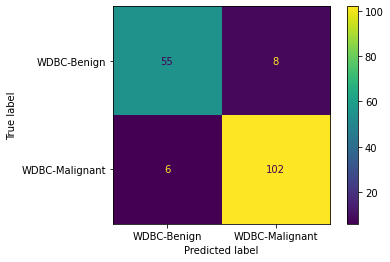

In [ ]:
# visualize the confusion matrix
disp = ConfusionMatrixDisplay(
    confusion_matrix = cm,
    display_labels = ['WDBC-Benign', 'WDBC-Malignant']
)
disp.plot()
plt.show()

#### Accuracy, precision, recall & F1-score

We can calculate these metrics manually using the confusion matrix.

Or we can `sklearn` to automatically perform the calculation:
- `sklearn.metrics.accuracy_score`
- `sklearn.metrics.precision_score`
- `sklearn.metrics.recall_score`
- `sklearn.metrics.f1_score`

In [ ]:
# calculate the metrics manually
accuracy_test = (cm[0, 0] + cm[1, 1]) / cm.sum()
precision_test = cm[1, 1] / (cm[1, 1] + cm[0, 1])
recall_test = cm[1, 1] / (cm[1, 1] + cm[1, 0])
f1_test = 2 * precision_test * recall_test / (precision_test + recall_test)

# print the metrics
print("Accuracy:\t", accuracy_test)
print("Precision:\t", precision_test)
print("Recall:\t\t", recall_test)
print("F1-score:\t", f1_test)

Accuracy:	 0.9181286549707602
Precision:	 0.9272727272727272
Recall:		 0.9444444444444444
F1-score:	 0.9357798165137615


In [ ]:
# calcualte the metrics by sklearn
print("Accuracy:\t", accuracy_score(y_test, y_pred))
print("Precision:\t", precision_score(y_test, y_pred))
print("Recall:\t\t", recall_score(y_test, y_pred))
print("F1-score:\t", f1_score(y_test, y_pred))

Accuracy:	 0.9181286549707602
Precision:	 0.9272727272727272
Recall:		 0.9444444444444444
F1-score:	 0.9357798165137615


In [ ]:
# get all metrics using `classification_report`
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.87      0.89        63
           1       0.93      0.94      0.94       108

    accuracy                           0.92       171
   macro avg       0.91      0.91      0.91       171
weighted avg       0.92      0.92      0.92       171



#### ROC curve & AUC

Use `sklearn.metrics.roc_curve` to compute the ROC curve.

Use `sklearn.metrics.roc_auc_score` to calculate the AUC metric.

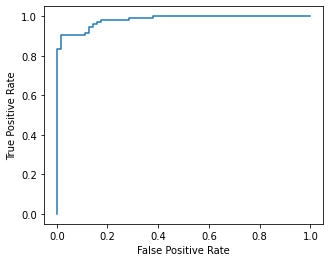

In [ ]:
# compute ROC curve
fpr, tpr, thresholds = roc_curve(
    y_test, # the true class
    y_pred_proba[:, 1], # the second column, the probability of being positive
    pos_label = 1 # the positive class is labeled as 1
)

# plot ROC curve
plt.figure(figsize = [5, 4])
plt.plot(fpr, tpr, '-')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
# calculate AUC
auc_test = roc_auc_score(
    y_test, # the true class
    y_pred_proba[:, 1], # the second column, the probability of being positive
)
print("AUC:\t", auc_test)

AUC:	 0.982363315696649


## Part 2. Hands-on exercise

In this exercise, we will build a logistic regression model with the the [California Housing dataset](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset), the same one as Exercise 02 & 04.

The goal of the logistic regression model is to perform a binary classification taks:
- 0 represent 'Normal Price'
- 1 represent 'Expensive Price'

Since there is no such categorical columns in the dataset, we need to create the target labels according to the `MedHouseVal`, which used to be the target variable for regression problem.
- `MedHouseVal` <= 2.5 $\rightarrow$ 'Normal Price'
- `MedHouseVal` > 2.5 $\rightarrow$ 'Expensive Price'

<span style="color:red">**[TBC]**</span> Please complete the following tasks:
- Load the California Housing Dataset
- Create target labels
- Split the dataset into the training and testing part
- Train the logistic regression model
- Evaluate the trained model with various metrics

### Task 1. Load the California Housing Dataset

<span style="color:red">**[TBC]**</span> It can be downloaded/loaded using the `sklearn.datasets.fetch_california_housing()` function.

In [ ]:
# [TBC] complete your code here with proper comments
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

### Task 2. Create the target labels

<span style="color:red">**[TBC]**</span> Use `MedHouseVal` as the reference to create a pandas series as the new targel variable.

In [ ]:
# [TBC] complete your code here with proper comments
feature_df, target_df = fetch_california_housing(
    return_X_y = True, # return features and target separately
    as_frame = True, # return features and target as pandas DataFrame or Series
    # scaled = False # return raw values
)
target_df = pd.DataFrame(target_df, columns=['MedHouseVal'])
target_df['MedHouseVal'] = (target_df['MedHouseVal'] > 2.5).astype(int)
# target_df.head()



### Task 3. Split the dataset into the training and testing part
<span style="color:red">**[TBC]**</span> Please split the whold dataset into two parts: the training and testing set. Please use 70% of the data as the training dataset, and the rest as the testing dataset.

In [ ]:
# [TBC] complete your code here with proper comments
 # Splitting dataset
print("Numver of negative class:", sum(target_df['MedHouseVal'] == 0))
print("Numver of positive class:", sum(target_df['MedHouseVal'] == 1))

X_train, X_test, y_train, y_test = train_test_split(
    feature_df.values,
    target_df.values,
    train_size = 0.7,
    shuffle = True,
    random_state = 0
)

Numver of negative class: 14858
Numver of positive class: 5782


### Task 4. Train the logistic regression model
<span style="color:red">**[TBC]**</span> Please use `sklearn.linear_regression.LogisticRegression` to implement logistic regression and train the binary classifier.

In [ ]:
# [TBC] complete your code here with proper comments

#Use max iterations
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)



c:\Users\CristianMedina\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000)

### Task 5. Evaluate the trained model with various metrics

<span style="color:red">**[TBC]**</span> Please complete the following steps:
- make predictions for the testing dataset
- compute and visualize the confusion matrix
- calculate accuracy, precision, recall, and F1-score
- compute the ROC curve and AUC
- analysis the performance of this classifier

[[4179  271]
 [ 673 1070]]


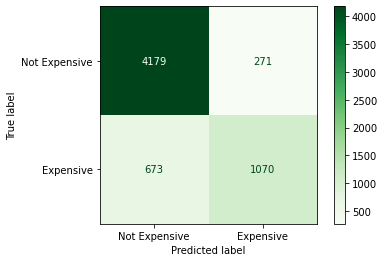

Accuracy:	 0.8475698369126433
Precision:	 0.7979120059656972
Recall:		 0.6138841078600115
F1-score:	 0.6939040207522698


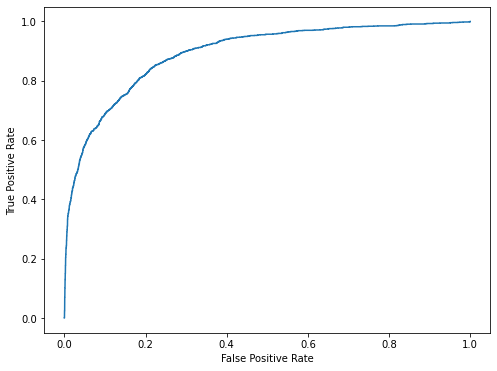

AUC:	 0.8934152017379309


In [ ]:
# [TBC] complete your code here with proper comments

clf.predict_proba(X_test[:5, :])
clf.predict(X_test[:5, :])
y_pred_proba = clf.predict_proba(X_test)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
disp = ConfusionMatrixDisplay(
    confusion_matrix = cm,
    display_labels = ['Not Expensive', 'Expensive']
)
disp.plot(cmap='Greens')
plt.show()

print("Accuracy:\t", accuracy_score(y_test, y_pred))
print("Precision:\t", precision_score(y_test, y_pred))
print("Recall:\t\t", recall_score(y_test, y_pred))
print("F1-score:\t", f1_score(y_test, y_pred))

fpr, tpr, thresholds = roc_curve(
    y_test, # the true class
    y_pred_proba[:, 1], # the second column, the probability of being positive
    pos_label = 1 # the positive class is labeled as 1
)

# plot ROC curve
plt.figure(figsize = [8, 6])
plt.plot(fpr, tpr, '-')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

auc_test = roc_auc_score(
    y_test, # the true class
    y_pred_proba[:, 1], # the second column, the probability of being positive
)
print("AUC:\t", auc_test)

<span style="color:red">**[TBC]**</span> Write your analysis here.


The AUC value indicates that there is an approximately 89.34% chance that the classifier will assign a higher score to a randomly chosen positive instance than to a randomly chosen negative instance. This is a sign of good accuracy in the predictions made by the model

The curve does not reach the perfect top-left corner, which would represent a 100% true positive rate and a 0% false positive rate. However, it does seem to approach that corner closely, indicating a high true positive rate for most thresholds, with a relatively low false positive rate.

### Challenge. Build a multi-class classifier using Logistic Regression

`sklearn.linear_model.LogisticRegression` can also be used to build a multi-class classifier.

Instead of having binary class as the target, create the target labels as follows:
- 0 represents 'Low Price', 'MedHouseVal' < 1
- 1 represents 'Normal Price', 1 <= 'MedHouseVal' <= 2.5
- 2 represents 'Expensive Price', 'MedHouseVal' > 2.5

Read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) here and train a multi-class classifier following the one-vs-rest scheme.

Compute the confusion matrix, accuracy, precision, recall, f1_score, ROC curve and AUC in the context of multi-class classification.

If you get confused by the multi-class situation, read this [blog](https://www.v7labs.com/blog/confusion-matrix-guide) will help.

<span style="color:red">**[TBC]**</span> This challenge won't be evaluated and counted towards your grade. You may submit this assignment without solving this challenge. However, leaving this part blank is not allowed. Try to complete the code even if it doesn't meet the requirements.

0     3658
2     5782
1    11200
Name: MedHouseVal, dtype: int64


c:\Users\CristianMedina\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\CristianMedina\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[ 537  558    3]
 [ 230 2846  276]
 [  16  649 1078]]


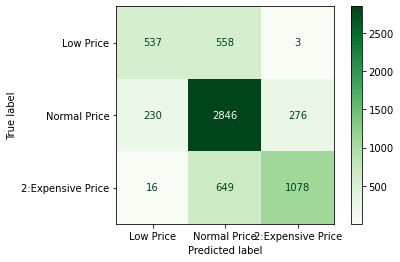

0.7203294041659939
0.7252435534160578
0.7203294041659939
0.7130208050478345


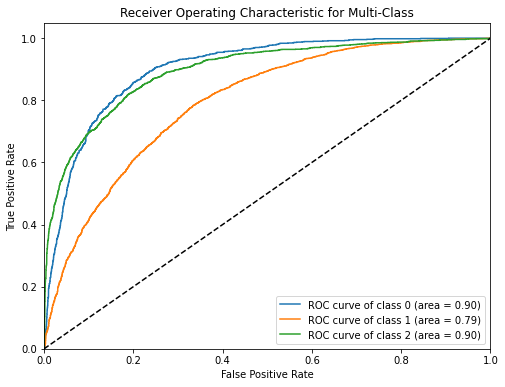

In [15]:

# [TBC] complete your code here with proper comments
# [TBC] complete your code here with proper comments
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

feature_df, target_df = fetch_california_housing(return_X_y=True, as_frame=True)
target_df = pd.DataFrame(target_df, columns=['MedHouseVal'])
#Use pd.cut() function to segment and sort data values into bins or categories. 
# You use it to convert continuous variable into a categorical variable
# bins=[-float('inf'), 1, 2.5, float('inf')]: (-infinity,1),[1, 2.5), and [2.5, infinity)
 
target_df['MedHouseVal'] = pd.cut(target_df['MedHouseVal'], bins=[-float('inf'), 1, 2.5, float('inf')], labels=[0, 1, 2])
target_df['MedHouseVal'].head()
label_counts = target_df['MedHouseVal'].value_counts()
print(label_counts.head().sort_values(ascending=True))

# print("Number of normal class:", sum((target_df['MedHouseVal'] == 1))
# print("Number of expensive class:", sum(target_df['MedHouseVal'] == 2))

X_train, X_test, y_train, y_test = train_test_split(
    feature_df.values,
    target_df.values,
    train_size = 0.7,
    shuffle = True,
    random_state = 0
)

clf = LogisticRegression(max_iter=3000, multi_class= 'auto')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


# # Output the calculated metrics
print(cm)
disp = ConfusionMatrixDisplay(
    confusion_matrix = cm,
    display_labels = ['Low Price', 'Normal Price', '2:Expensive Price']
)
disp.plot(cmap='Greens')
plt.show()

# accuracy, precision, recall, f1, roc_auc
print(accuracy)
print(precision)
print(recall)
print(f1)

# ROC and AUC for multi-classq
y_prob = clf.predict_proba(X_test)
fpr, tpr, roc_auc = {}, {}, {}
n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], _ = roc_curve(y_test, y_prob[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])


plt.figure(figsize=(8, 6))
for i in range(n_class):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')
    
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-Class')
plt.legend(loc="lower right")
plt.show()
